<a href="https://colab.research.google.com/github/mtyagi16/data_mining_7/blob/main/data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving facies_vectors.csv to facies_vectors.csv


In [ ]:
path='/content/facies_vectors.csv'
data=pd.read_csv(path)

In [ ]:
data.head()

,label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [ ]:
data['Well Name'].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [ ]:
data.describe()

,label,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


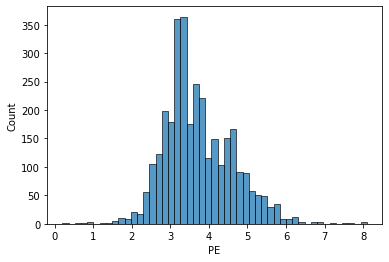

In [ ]:
import seaborn as sns
sns.histplot(data.PE)
plt.show()

1    268
2    940
3    780
4    271
5    296
6    582
7    141
8    686
9    185
Name: label, dtype: int64


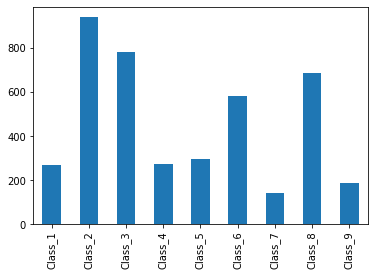

In [ ]:
data['label'].value_counts().sort_index().plot(kind='bar')
print(data['label'].value_counts().sort_index())
X_ind = np.arange(0,9,1)
plt.xticks(X_ind,['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6','Class_7','Class_8','Class_9'])
plt.show()

As, we can observe that there are some missing values in the PE field. All other attributes have 4149 entries, whereas PE attribute has only 3232 values. We will try filling in missing values by different methods such as mean, median or mode.

In [ ]:
missing = pd.isnull(data['PE'])
data[missing]
#This shows the rows where value of PE is NOT AVAILABLE.

,label,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
471,3,A1 SH,ALEXANDER D,2887.5,88.710,0.612,6.700,10.6050,NaN,1,1.000
472,3,A1 SH,ALEXANDER D,2888.0,92.710,0.583,11.000,12.5150,NaN,1,0.974
473,3,A1 SH,ALEXANDER D,2888.5,94.540,0.579,12.000,13.4100,NaN,1,0.949
474,3,A1 SH,ALEXANDER D,2889.0,95.310,0.579,11.500,13.7500,NaN,1,0.923
475,3,A1 SH,ALEXANDER D,2889.5,93.790,0.572,10.300,13.4050,NaN,1,0.897
...,...,...,...,...,...,...,...,...,...,...,...
3227,9,C LM,Recruit F9,3129.5,19.160,1.162,2.586,7.6070,NaN,2,0.560
3228,9,C LM,Recruit F9,3130.0,20.461,1.031,2.503,8.6935,NaN,2,0.548
3229,9,C LM,Recruit F9,3130.5,23.425,0.791,4.017,9.9725,NaN,2,0.536
3230,9,C LM,Recruit F9,3131.0,31.562,0.759,5.805,9.5265,NaN,2,0.524


In [ ]:
#Calculating the mean
data.mean(axis=0,skipna=True)
#The mean of the attribute PE is coming out to be 3.725

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


label           4.503254
Depth        2906.867438
GR             64.933985
ILD_log10       0.659566
DeltaPHI        4.402484
PHIND          13.201066
PE              3.725014
NM_M            1.518438
RELPOS          0.521852
dtype: float64

In [ ]:
#Filling in the values
data['PE'].fillna(data['PE'].mean(), inplace=True)

In [ ]:
data.describe()
#Now, each column has same number of attributes.

,label,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.790917,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.200000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.725014,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.000000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


After this, we need to detect outliers and remove them. We will use the Z-score to identify outliers and then set a threshold and then remove any data point whose value is beyond the set threshold.

In [ ]:
from scipy import stats

In [ ]:
z = np.abs(stats.zscore(data['PE']))
print(z)
#demonstration of Z score

[1.1064266  0.47417277 0.15808106 ... 0.67652921 0.7245805  0.5437559 ]


In [ ]:
data= data[(np.abs(stats.zscore(data.select_dtypes(exclude='object'))) < 3).all(axis=1)]
data.describe()
#After removing the outliers, we are left with 3910 rows. Initially, we had 4149 rows.

,label,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,4.470844,2905.151662,62.840201,0.657035,4.853763,12.567314,3.735600,1.517391,0.523200
std,2.466360,133.072528,24.540555,0.245237,4.652364,5.495094,0.701619,0.499761,0.284218
min,1.000000,2573.500000,11.587000,-0.025949,-11.400000,0.550000,1.800000,1.000000,0.000000
25%,2.000000,2820.625000,44.347250,0.497000,1.800000,8.514625,3.260500,1.000000,0.281000
50%,4.000000,2931.000000,64.461000,0.640000,4.460500,11.900000,3.725014,2.000000,0.526000
75%,6.000000,3005.500000,78.815000,0.820000,7.700000,15.666500,4.000000,2.000000,0.768000
max,9.000000,3137.500000,154.750000,1.405000,19.312000,34.290000,6.094000,2.000000,1.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [ ]:
feature_cols = ['Depth', 'GR', 'ILD_log10', 'DeltaPHI','PHIND','PE','NM_M','RELPOS']
X = data[feature_cols] # Features
y = data.label # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6717817561807332


In [ ]:
from sklearn import tree

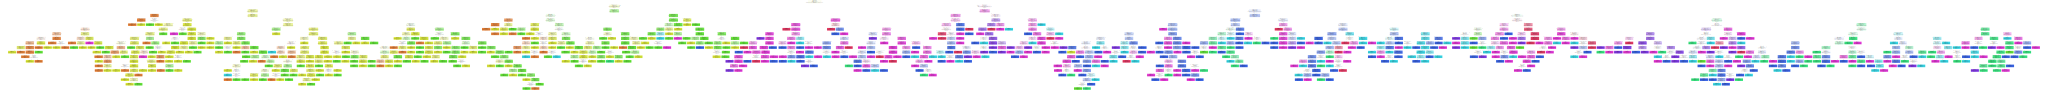

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols,  
                                class_names=['1','2','3','4','5','6','7','8','9'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_list = [5, 7, 10]
weight_list = ['uniform', 'distance']
i=0

for weight in weight_list:
  scores = list()
  score_tests = list()
  i = i + 1

  for neighbor in neighbor_list:
    clf_cv = KNeighborsClassifier(n_neighbors=neighbor, weights=weight)
    clf_cv.fit(X_train, y_train)
    scores.append(clf_cv.score(X_train, y_train))
    score_tests.append(clf_cv.score(X_test, y_test))
    print(scores)

[0.7636097917427841]
[0.7636097917427841, 0.7197661673364998]
[0.7636097917427841, 0.7197661673364998, 0.6711728169528681]
[1.0]
[1.0, 1.0]
[1.0, 1.0, 1.0]


In [ ]:
clf_knn = KNeighborsClassifier(weights='distance')
clf_knn.fit(X_train, y_train)
preds_knn = clf_knn.predict(X_test)
print(metrics.accuracy_score(y_test, preds_knn))

0.7050298380221653


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_clf= RandomForestClassifier(n_estimators = 100) 
random_clf.fit(X_train, y_train)
y_pred = random_clf.predict(X_test)

In [ ]:
print("ACCURACY OF THE RANDOM FOREST IS: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE RANDOM FOREST IS:  0.7638533674339301


No handles with labels found to put in legend.


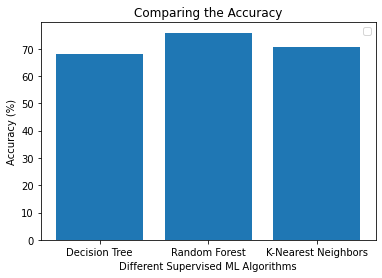

In [ ]:
import matplotlib.pyplot as plt

plt.bar(["Decision Tree","Random Forest","K-Nearest Neighbors"],[68.03,75.87,70.5])
plt.legend()

plt.xlabel('Different Supervised ML Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Comparing the Accuracy')

plt.show()